# Mini Projet Macs205  
### Hugues René-Bazin

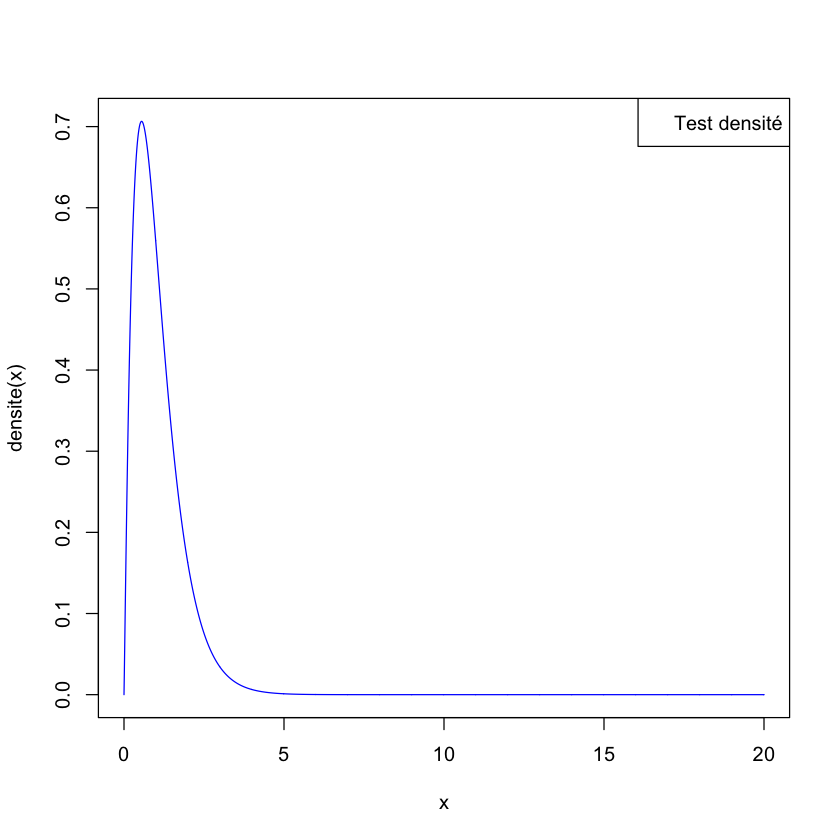

In [1]:
# intialisation de la fonction densité : 
K <- 2.1 ## parametre k  de la loi gamma 
THETA <- 0.5 ## parametre theta de la loi gamma
densite <- function(x){dgamma(x, shape = K, scale = THETA)}

#plot de densité avec un vecteur : 

x <- seq(0,20,0.01)

plot(x, densite(x),type = 'l',col = 'blue')
legend('topright',legend = 'Test densité', col = 'blue')

## II - Interpolation polynomiale 

Méthodes issues du TP1 utiles dans cette partie 

In [2]:
dividif_old=function(x,y){
  ## Computes the divided differences (coefficients on the Newton basis) for
  ##  Lagrange interpolation.
  ##
  ## @title dividif: Newton's Divided differences
  ## @param x a vector containing the interpolation nodes 
  ## @param y a vector of same size as x: values of the interpolated function at
  ##          the nodes
  ## @return a vector of same size as x: the divided differences
  ##         \eqn{f_[x_0, ... x_k]} of order 'length(x) -1'.
  
  n = length(x) -1 ## n: degree of Lagrange polynomial.
  Tmat = matrix(ncol = n+1, nrow = n+1)
  Tmat[,1]  = y ## initialisation of the vector of divided differences: 
  if(n ==0) {return(diag(Tmat))} 
  for (j in 2:(n+1) ) {
    Tmat[j : (n+1), j ] = (Tmat[j : (n+1), (j-1)] - Tmat[(j-1) : n, (j-1)]) / (x[j:(n+1)] - x[1 : (n+2-j)])  
  }
  return(diag(Tmat))
}

dividif=function(x,y){
  ##  Newton's Divided differences
  ## @param x: a vector containing the interpolation nodes 
  ## @param y: a vector of same size as x:
  ##           values of the interpolated function at the nodes
  ## @return : a vector of same size as x:
  ##          the divided differences
  ##          \eqn{f_[x_0, ... x_k]} of order 'length(x) -1'. 
  
  n = length(x) - 1
  d  = y 
  for (j in 2:(n+1) ) {
    d[j : (n+1) ] = ( d[j:(n+1)] - d[(j-1):n])/(x[j:(n+1)] - x[1:(n-j+2)])
  }
  return(d)
}


hornerNewton = function(a,x,z){
  ## Horner's method: Evaluates  a polynom P at points z, given
  ## nodes x and the coefficients a of P in Newton's basis
  ##
  ## @param a : vector: the  coefficients of the polynomial in
  ##           Newton's basis
  ## @param x : the interpolation nodes. 
  ## @param z : vector of points where the polynom needs to be
  ##            evaluated. 
  ## @return  : a vector of same size as z: the value of the
  ##            polynomial at points z.
  ## 
  n <- length(x) - 1 ## degree of the Lagrange poynomial 
  if( (n < 0) || (length(a) != (n+1)) )
  {
    stop('at least one interpolating point is needed,
              a and x should have same length')
  }
  f <- a[n+1]*rep(1,length(z))
  if(n >= 1){
    for( k in 1:n){
      f <- f*(z-x[n+1-k])+ a[n+1-k]
    }
  }
  return(f)
}

interpolDividif=function(x,y,z){
  ## Efficient Lagrange interpolation using Horner's method with  
  ## Newton basis for evaluation
  ## @param x : vector containing the interpolation nodes 
  ## @param y : vector of same size as x: values of the interpolated
  ##            function at the nodes
  ## @param z : vector of points where the  interpolating polynomial
  ##            needs to be evaluated. 
  ## @return  : vector of same size as z: the value of the
  ##            interpolating polynomial at points z.
  
  a = dividif(x,y)
  
  return(hornerNewton(a,x,z))
  
}

interpolLagrange =function(n, a, b, neval, nodes = 'equi', FUN, Plot = FALSE){
  ## Generic Lagrange interpolation, with equidistant or Chebyshev nodes. 
  ## @param n : the degree of the interpolating polynomial on each
  ## subinterval
  ## @param a : left end-point of the interval
  ## @param b : right end-point of the interval
  ## @param neval :number of evaluation points (a regular grid will be
  ## used on [a,b]
  ## @param nodes :string, either "equi" (default) for equidistant
  ## Lagrange interpolation (on each subinterval) or "cheby" for
  ## using Chebyshev nodes.
  ## @param FUN: the function to be interpolated 
  ## @param Plot : logical. Setting 'Plot' to TRUE produces a plot
  ## showing the graph of
  ## the true functions and its interpolation.  
  ## @return : vector of size 'neval': the values of the Lagrange
  ## polynomial on an equi-distant grid.
  
  if (nodes == "equi"){
   x <-  seq(-1,1, length.out =n+1) #points équidistants 
  }
  else if (nodes == "cheby"){
      
    x <-cos(((0:n + 0.5)*pi/(n+1))) #base de Tchebychev sur [-1,1]
  }
  else{stop("the nodes must be either 'equi' or 'cheby'") }
  
  ##
  ## Complete the code: compute a vector 'f' containing
  ## the interpolated  values on an equidistant
  ## evaluation grid 'z'. 
  ##
  ##
    z <- seq(a,b,length.out = neval)
    z1 <- (z - (a+b)/2)*2/(b-a)
    x_ab <- (a+b)/2 + (b-a)/2*x
    y <- sapply(x_ab,FUN = FUN)
    f <- interpolDividif(x,y,z1)
  
  if( Plot ){
    if (nodes == "equi"){ methodName = " equidistant "}
    else {   methodName = " Chebyshev "}
    
    plot(z, sapply(z,FUN), type="l", ylim=range(c(y,f)) )
    title(main = paste("Lagrange interpolation with ",
                       toString(n+1), methodName,
                       " nodes", sep=""))
    lines(z,f, col = 'blue') 
    
    legend('topright', legend=c('function','interpolation'),
           col = c('black','red'), lwd=1)
    
  }

   return(f)              
}

#### II.1 - Mise en évidence du phénomène de Runge

> Noeuds equidistants :

On observe l'apparition du phénomène de Runge à partir de 53 noeuds (très léger pour cette valeur de $n$ en bas à droite) 

[1]  0.000000e+00  3.600434e-01  5.800069e-01  6.828202e-01  7.061793e-01
  [6]  6.802760e-01  6.265468e-01  5.594538e-01  4.883426e-01  4.189495e-01
 [11]  3.545391e-01  2.967326e-01  2.460945e-01  2.025394e-01  1.656082e-01
 [16]  1.346513e-01  1.089461e-01  8.776929e-02  7.043975e-02  5.633992e-02
 [21]  4.492515e-02  3.572457e-02  2.833740e-02  2.242667e-02  1.771193e-02
 [26]  1.396165e-02  1.098608e-02  8.630606e-03  6.769931e-03  5.302949e-03
 [31]  4.148416e-03  3.241276e-03  2.529603e-03  1.972068e-03  1.535864e-03
 [36]  1.195006e-03  9.289601e-04  7.215317e-04  5.599700e-04  4.342533e-04
 [41]  3.365172e-04  2.605990e-04  2.016759e-04  1.559783e-04  1.205636e-04
 [46]  9.313676e-05  7.191015e-05  5.549242e-05  4.280160e-05  3.299743e-05
 [51]  2.542733e-05  1.958523e-05  1.507909e-05  1.160488e-05  8.927632e-06
 [56]  6.865295e-06  5.277593e-06  4.055523e-06  3.115307e-06  2.391485e-06
 [61]  1.835569e-06  1.409325e-06  1.079018e-06  8.237518e-07  6.376383e-07
 [66]  4.730573e-07  3.667789e-07  2.909158e-07  1.778865e-07  1.228128e-07
 [71]  1.172583e-07 -1.676173e-09 -8.255067e-09 -3.046164e-07 -2.964812e-07
 [76] -3.546977e-07 -5.637336e-07 -5.576029e-07 -1.911010e-06 -2.419000e-07
 [81] -1.162210e-06 -4.830934e-06 -4.512870e-06 -6.476308e-06 -7.387761e-06
 [86] -1.657907e-05 -9.849246e-06 -3.820872e-05 -4.449717e-05 -5.804544e-05
 [91] -9.307815e-05 -4.819249e-05 -1.804330e-04 -2.101139e-04 -2.735438e-04
 [96] -3.269550e-04 -1.351878e-03 -9.303534e-04 -1.479024e-03 -3.474612e-03

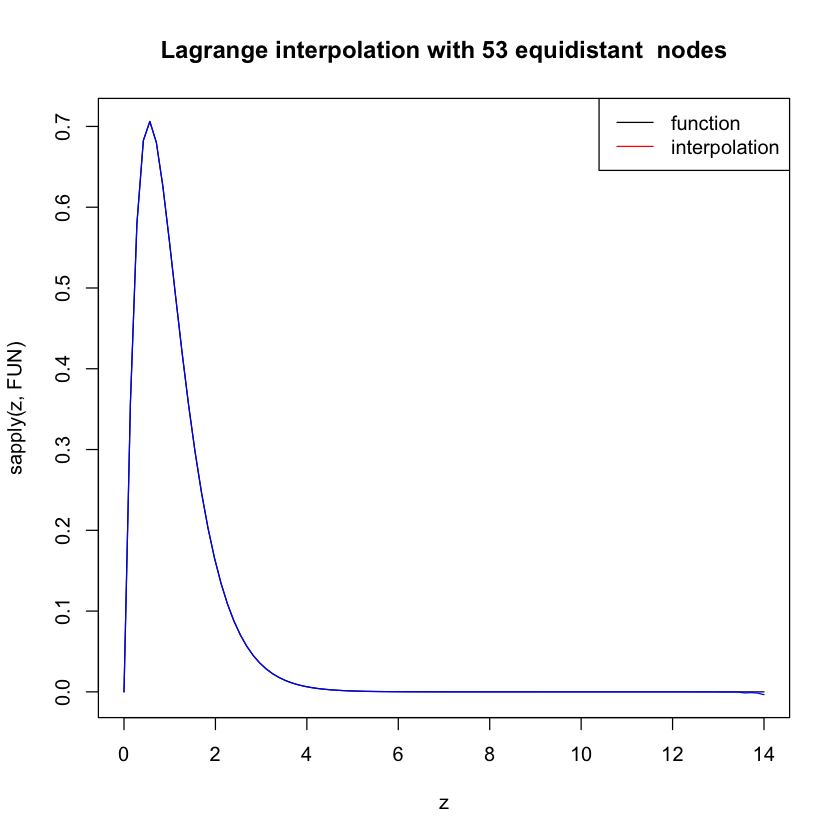

In [3]:
a <- 0
b <- 14

# On fait varier n qui correspond au degré du polynôme d'interpolation sur chaque sous intervalle 
n_eq <- 52

interpolLagrange(n_eq,a,b,100,nodes = 'equi',densite,Plot = TRUE)

> Noeuds de Tchebychev 

On observe l'apparition du phénomène de Runge à partir de $83$ noeuds (sur le pic on constate que les deux courbes ne se supperposent plus exactement)

[1]  1.225010e-01  4.071484e-01  6.035006e-01  6.845469e-01  7.151622e-01
  [6]  6.866436e-01  6.266976e-01  5.612255e-01  4.890587e-01  4.197510e-01
 [11]  3.547050e-01  2.968958e-01  2.460970e-01  2.025883e-01  1.656057e-01
 [16]  1.346481e-01  1.089525e-01  8.776982e-02  7.044170e-02  5.633903e-02
 [21]  4.492571e-02  3.572504e-02  2.833712e-02  2.242691e-02  1.771228e-02
 [26]  1.396130e-02  1.098598e-02  8.631001e-03  6.769779e-03  5.302659e-03
 [31]  4.148709e-03  3.241403e-03  2.529268e-03  1.972090e-03  1.536170e-03
 [36]  1.194869e-03  9.287181e-04  7.217419e-04  5.601333e-04  4.340049e-04
 [41]  3.364319e-04  2.608584e-04  2.016908e-04  1.557271e-04  1.206085e-04
 [46]  9.336673e-05  7.181645e-05  5.529236e-05  4.293381e-05  3.316172e-05
 [51]  2.526631e-05  1.946089e-05  1.525995e-05  1.168635e-05  8.736104e-06
 [56]  6.829684e-06  5.470801e-06  4.044824e-06  2.932237e-06  2.450606e-06
 [61]  1.998499e-06  1.307934e-06  9.561000e-07  9.680657e-07  7.109990e-07
 [66]  3.270880e-07  3.626707e-07  4.463394e-07  1.609117e-07  4.036459e-08
 [71]  2.482584e-07  1.588019e-07 -7.424095e-08  8.969444e-08  1.678400e-07
 [76] -8.255457e-08 -7.384291e-09  1.577579e-07 -6.980232e-08 -4.374864e-08
 [81]  1.432137e-07 -7.970548e-08 -2.638919e-08  1.221299e-07 -1.159917e-07
 [86]  5.246389e-08  3.820520e-08 -9.702930e-08  1.230059e-07 -1.161407e-07
 [91]  1.015181e-07 -8.871867e-08  9.073272e-08 -1.046378e-07  1.151702e-07
 [96] -6.513126e-08 -8.087172e-08  1.262275e-08 -5.931063e-08  1.095031e-07

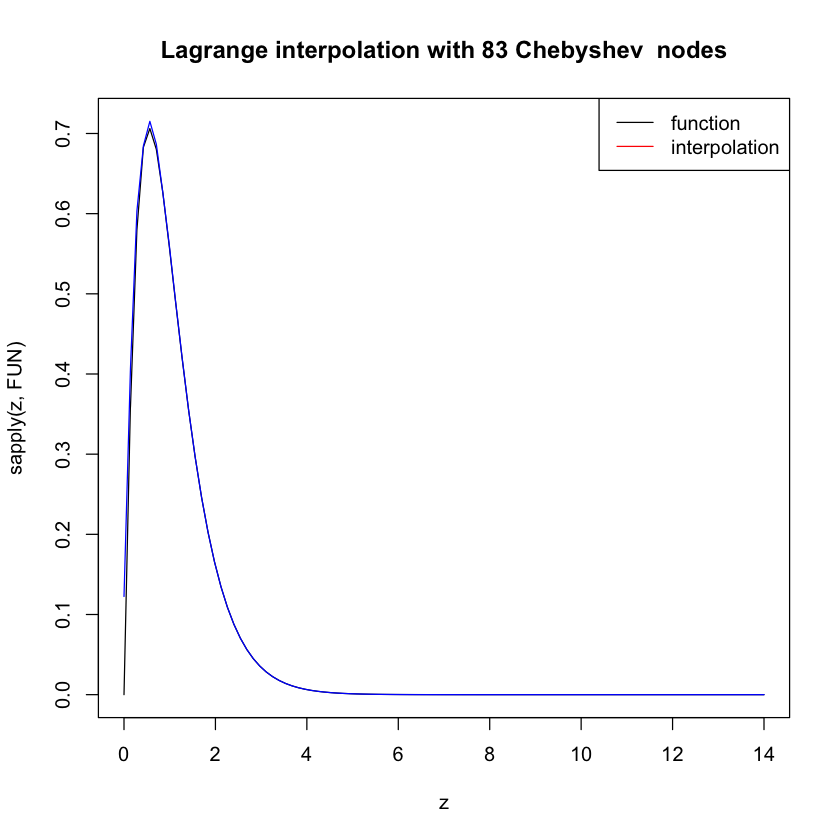

In [4]:
# On fait varier n qui correspond au degré du polynôme d'interpolation sur chaque sous intervalle 


n_cheb <- 82

interpolLagrange(n_cheb,a,b,100,nodes = 'cheby',densite,Plot = TRUE)

### II.2 - Interpolation par morceaux 

> 2.a.(i) interpolation de Lagrange de degré n avec M sous intervalles noeuds equidistants.

L'interpolation de Lagrange de degré nécessite $n+1$ points par sous intervalle. Mais sur le i-ème sous intervalle on prend $a_i = (x_i)_0$ et $b_i = (x_i)_n$ avec $b_{i-1} = a_i$ donc on enlève M-1 appels à  `densité` qui ont déjà été effectué. On a donc besoin de $M(n+1) - (M-1) = Mn +1$ appels à `densite`.

> 2.a.(ii) interpolation de Lagrange de degré n avec M sous intervalles noeuds de Tchebychev.

Quand on utilise les noeuds de Tchebychev, pour chaque intervalles les $(x_k)$ sont égaux à : 
$\displaystyle \forall k \in \{ 1, ..., n+1 \}, x_k = \frac{a_i+b_i}{2} + (\frac{b_i - a_i}{2})cos(\frac{(k + \frac{1}{2})\pi}{n+1})$. Cette fois ci on ne peut donc pas "économiser" d'appel à `densite`.

On a donc dans ce cas besoin de $M(n+1)$ appels à densité.

### II.2.b) Algorithme permettant de choisir $(M,n)$ optimaux 

In [7]:
piecewiseInterpol=function(n,nInt,a,b,neval, nodes = "equi", FUN, Plot){
    ## @param n : the degree of the interpolating polynomial on each
    ## subinterval
    ## @param nInt :  the number of sub-intervals
    ## @param a, b : endpoints of the interval
    ## @param neval : the number of points on the interpolating grid (on
    ## each subinterval)
    ## @param nodes : string, either "equi" (default) for equidistant
    ## Lagrange interpolation (on each subinterval) or "cheby" for
    ## chebyshev nodes.
    ## @param FUN the function to be interpolated
    ## @param Plot : logical. Should the result be plotted ?
    ## @return : a matrix with 2 rows and neval * nInt -neval + 1:
    ## values of the interpolated funtion on a regular grid (first row)
    ## and the corresponding abscissas (second row).

    intEndPoints = seq(a,b,length.out = nInt+1)
    f = c()
    z = c()
    for (m in 1:nInt){
        A = intEndPoints[m]; B = intEndPoints[m+1] 
        
        fm = interpolLagrange(n, A, B, neval,nodes,FUN,FALSE)
            zm = seq(A, B, length.out = neval) 
                
                if( m >= 2){
                    ## remove first element of zm, fm to avoid
                    ## duplicate values of the  interpolating vector
                    zm <- zm[-1]
                    fm <- fm[-1]
                    ## Complete the code
                }
        z = c(z,zm)
        f = c(f,fm)
    }

    if (Plot == 1){
        if (nodes == "equi") {methodName = " equidistant "}
        else  {methodName = " Chebyshev "}
        
        
        plot(z, sapply(z,FUN),type="l")
        title(main = paste("Piecewise  Lagrange  interpolation with ",
                           toString(n+1), methodName, " nodes  on ",
                           toString(nInt), " Intervals", sep=""))
        lines(z,f, col='red', lwd=2)
        legend('topright', legend = c('function','interpolation'),
               lwd=c(1,2), col=c('black','red'))
    }
    return(rbind(f,z))
}

#### Valeur de M : 

- Noeuds equidistants : $Mn +1 \leq budget \Leftrightarrow M \leq \text{E}(\frac{budget -1}{n})$, avec E la partie entière.


- Noeuds Tchebychev :  $M(n +1) \leq budget \Leftrightarrow M \leq \text{E}(\frac{budget}{n+1})$

[1] "n  - M - error  :"


[1] 49.000000000  3.000000000  0.001499558

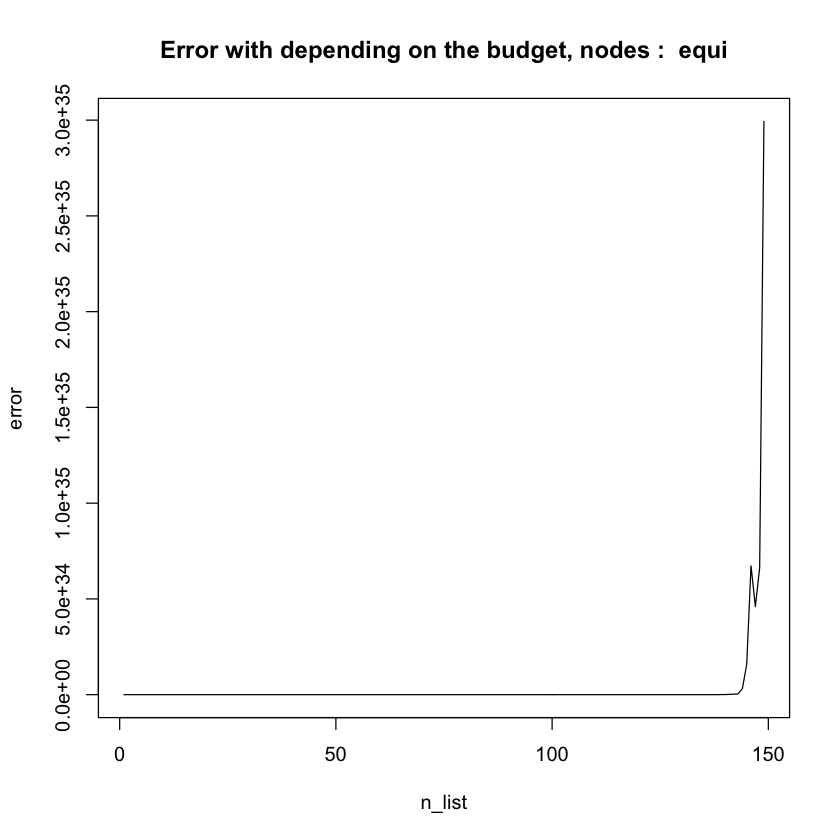

In [8]:
## On se place dans le cas de l'interpolation par morceaux 

optimalMn = function(FUN,a,b,neval, nodes = 'equi', budget, Plot = 1){
    ## @param FUN the function to be interpolated
    ## @param a, b : endpoints of the interval
    ## @param neval : the number of points on the interpolating grid (on
    ## each subinterval)
    ## @param nodes : string, either "equi" (default) for equidistant
    ## Lagrange interpolation (on each subinterval) or "cheby" for
    ## chebyshev nodes.
    ## @param budget : maximal number of evaluations of densite
    ## @param Plot : logical. Should the result be plotted ?
    
    # We take a M_list and a n_list so that we can plot the error 
    M_list <- c()
    n_list <- c()
    error <- c()
    for(n in 1:(budget-1)){
        
        # we split depending on the couple (M,n) we want to find is in the case of nodes equi or cheby
        
        if (nodes == "equi"){
            
            M <- (budget-1)%/%n #on veut une partie entière 
            
            n_list <- c(n_list,n)
            M_list <- c(M_list, M)
        }
        else if (nodes == "cheby"){
        
            M <- budget%/%(n+1) # idem
            
            n_list <- c(n_list,n)
            M_list <- c(M_list, M)
        }
        
        else{stop("the nodes must be either 'equi' or 'cheby'") }
    
        interpol = piecewiseInterpol(n,M,a,b,neval,nodes,FUN,FALSE) 
        error[n] <- max(abs(interpol[1,]-FUN(interpol[2,]))) 
    } 
    
    index <- which.min(error) # index with the minimal error
    
    
    
    
    if(Plot==1){
        plot(n_list, error, type = "l")
        title(main = paste("Error with depending on the budget, nodes : ", toString(nodes)))
    }
    
   
    return(c(n_list[index], M_list[index],min(error)))
}

print("n  - M - error  :")
optimalMn(densite,a = 0,b = 14,neval = 2000,'equi',budget =  150,1)

[1] "n  - M - error  :"


[1] 6.600000e+01 2.000000e+00 2.832363e-04

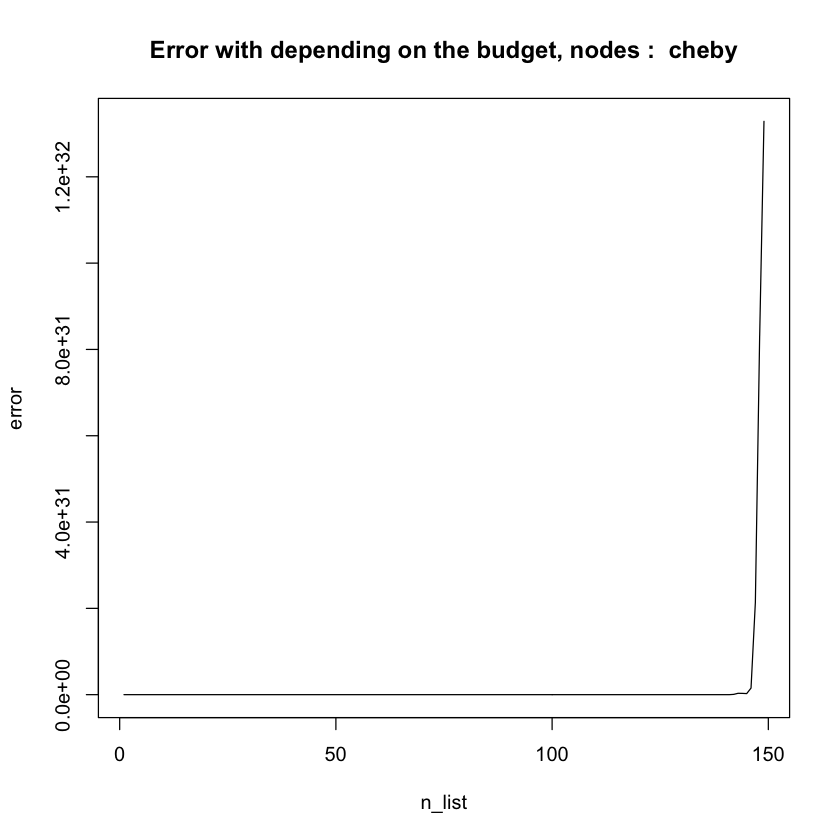

In [9]:
# Chebychev nodes : 

print("n  - M - error  :")
optimalMn(densite,a = 0,b = 14,neval = 2000,'cheby',budget =  150,1)

#### Remarques sur les deux couples $(M,n)$ optimaux  obtenus : 

- On observe deux courbes similaires : erreur d'abord faible mais quand on se rapproche de 150 qui devient immense 

- On a une erreur plus faible pour les noeuds de Tchebychev (~ 0.0002) que pour les noeuds equidistants (~0.001)

- les couples obtenus sont assez différents : 
    - noeuds equidistants : $(M,n) = (3, 49)$
    - noeuds de Tchebychev : $(M,n) = (2, 66 )$

## II - Méthodes de quadratures 

Méthodes issues du TP2 utiles dans cette partie 

In [10]:
trapezeInt =function(FUN,a,b,M){
  ##' TRAPEZOIDAL INTEGRATION RULE (COMPOSITE)
  ##' @param FUN : the function to be integrated
  ##' @param a, b : interval end points 
  ##' @param M : number of intervals (each of size (b-a)/M)
  ##' @return: the value of the composite trapezoidal quadrature. 
  x = seq(a,b, length.out= M+1)
  y = sapply(x, FUN)
  w = rep(1,M+1)
  w[1] = 0.5
  w[M+1] = 0.5
  h = (b-a)/M 
  q= sum(h*w*y)
    
    return(q)
}


refineTrapeze=function(FUN,a,b,M,q){
  ##' refinement of the subdivision step: incremental method
  ##' @param FUN : the function to be integrated
  ##' @param a, b : interval end points 
  ##' @param M : initial number of intervals (each of size (b-a)/M)
  ##'  having been used to compute q
  ##' @param  q : the value of the trapezoidal  quadrature method
  ##'  of stepsize (b-a)/M
  ##' @return : the value of the quadrature for a stepsize h' = h/2
  h = (b-a)/M
  x =  seq(a+h*0.5,b-h*0.5, length.out = M) 
    ##  x : a vector of size M :
    ##     the additional abscissas where 'fun' must be evaluated.
    y = sapply(x, FUN)
  Q = q*0.5 + sum(h*0.5*y)
    return(Q)
}

simpsonInt = function(FUN,a,b,M){
  ##' Simpson integration via trapeze rule
  ##' uses the fact that 
  ##' simpson(h) = 4/3(trapeze(h/2) - 1/4 trapeze(h))
  h = (b-a)/M;
  qtrapeze = trapezeInt(FUN,a,b,M) 
    qrefined = refineTrapeze(FUN,a,b,M,qtrapeze)
    q =  4/3*(qrefined -  1/4*qtrapeze)
    return(q)
}

evalErrSimpson=function(FUN,a,b,M){
  ## Computes an approximation E of the error 
  ## for the composite Simpson rule of step h=(b-a)/(2M). 
  ##This requires computing I_M and I_{2M}. 
  ##The value  q = I_{2M} is also returned. 
  qth = trapezeInt(FUN,a,b,M)   ## M +1 evaluations
  qth2 = refineTrapeze ( FUN,a,b,M,qth )  ## M evaluations
  qth4 = refineTrapeze ( FUN,a,b,2*M,qth2 )   ## 2M evaluations
  simps_h =   4/3*(qth2 - 1/4* qth ) 
  simps_h2 =  4/3*(qth4 -1/4 * qth2) 
    q = simps_h2  
    # Division par 2 d'après l'énoncé
  E = 1/15*(simps_h - simps_h2)/2
    return(c(E,q))
}


### II.1 - Méthode de Simpson 

> 1.a) On a le droit à 81 évaluations de la fonction `densité`. La méthode de Simpson s'écrit comme une combinaison linéaire de deux méthodes des Trapèzes. 
La méthode des trapèzes de taille $M$ nécessite $M$ évaluations de $f$. Donc sur un intervalle de taille $M$ la méthode de Simpson nécessite donc $2M$ appels à `densité`, donc comme nous sommes limités à $81$ appels à cette fonction on peut donc utiliser $40$ sous intervalles d'intégration. 


> 1.b) Calcul de l'erreur à postériori : 

In [11]:
a <- 0
b <- 3.5
M <- 40 

I_simpson = simpsonInt(densite,a,b, M)
Error = evalErrSimpson(densite,a,b,M/2)

print("Erreur commise avec le budget donné et estimation de l'intégrale par la méthode de Simpson :")
print( Error)

[1] "Erreur commise avec le budget donné et estimation de l'intégrale par la méthode de Simpson :"
[1] 4.211007e-06 9.914494e-01


> 1.c) Erreur relative commise sur l'erreur d'intégration 

In [12]:
Err_relative = function(FUN,a,b,M){
    
    evalErrSimpson = evalErrSimpson(FUN,a,b,M/2)
    E_hat <- evalErrSimpson[1]
    E_true <- abs(evalErrSimpson[2] - pgamma(b,shape = K, scale = THETA))
    
    Err_relative <- abs(E_hat - E_true)/E_true

    return(Err_relative)
}

Err_relative(densite,a,b,M)

[1] 0.8910344

### II.2 - Méthode de Romberg 

>1. vecteur renvoyé par la fonction `Romberg`

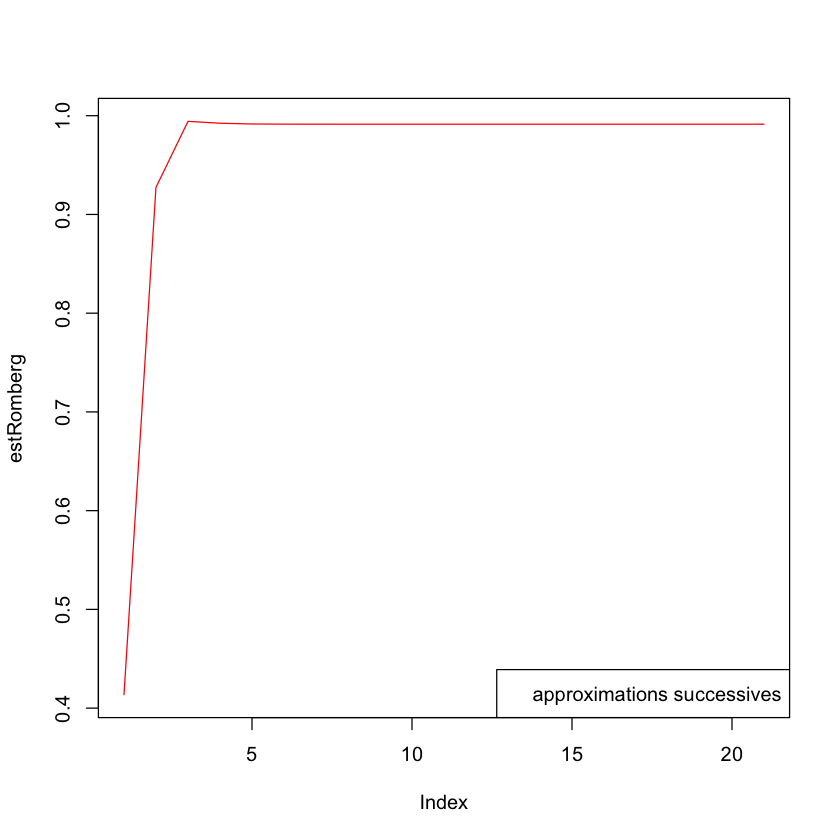

In [13]:
#redefinition des Constantes 
M = 2
n = 20
a = 0
b = 3.5

# Méthode de Romberg issue du TP2

romberg =function(FUN,n,a,b,M){
  ## methode de Romberg avec n etapes
  ## appliquee sur la fonction FUN sur l'intervalle (a,b), avec un
  ## pas initial h = (b-a)/M
  h= (b-a)/M 
  A = rep(0, n+1)
  A[1] = trapezeInt(FUN,a,b,M);
  Mc = M
  ## initialisation des differences divisees
  for( i in 2:(n+1)){
    A[i] = refineTrapeze( FUN,a,b, Mc, q= A[i-1])
    Mc = 2*Mc 
  }
  delta = 1/4;
  for (j in 2:(n+1)){
    A[j : (n+1) ] =  (A[j : (n+1)] - (delta^(j-1))*A[(j-1):n])/(1 - delta^(j-1))
  }
  return(A)
}

estRomberg = romberg(densite,n,a,b,M)
plot(estRomberg,type = 'l',col = 'red')
legend('bottomright',legend = 'approximations successives', col = 'red')

> 2. Graphique de l'erreur 

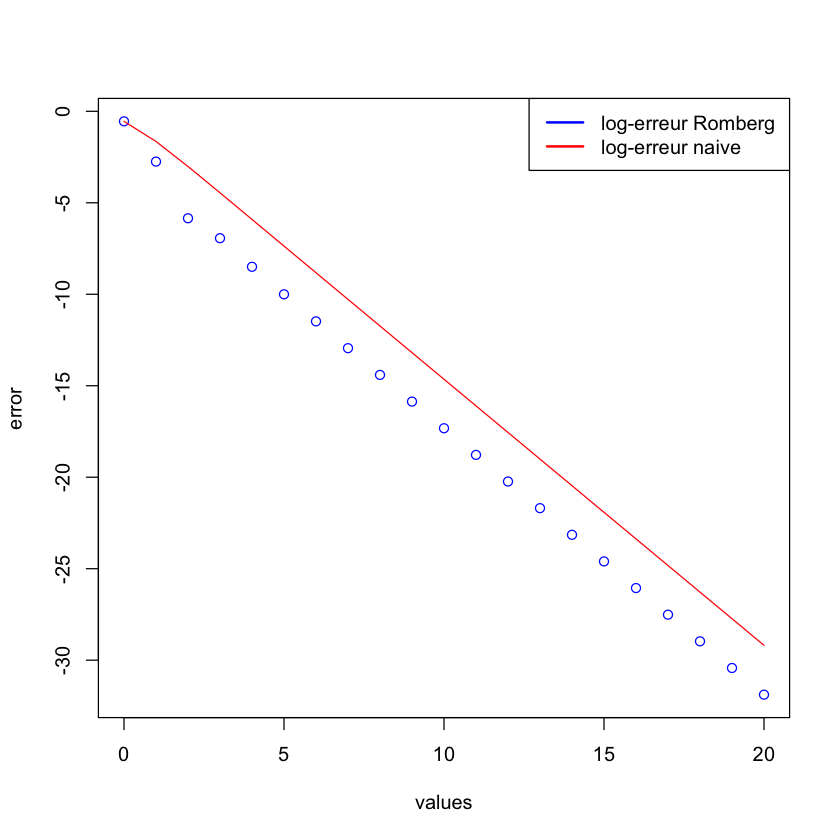

In [14]:
true_value = pgamma(b,shape = K, scale = THETA)
values <- 0:n
error <- log(abs(estRomberg-true_value))


naive_estimators = rep(0,n+1)
naive_estimators[1] = trapezeInt(densite,a,b,M)
Mc = M
for( i in 2:(n+1)){
    naive_estimators[i] <- refineTrapeze(densite,a,b, Mc, naive_estimators[i-1])
    Mc = 2* Mc 
} 
naive_error <- log(abs(naive_estimators-true_value))


plot(values, error, col = 'blue')
lines(values, naive_error, col = 'red')
legend('topright', legend=c('log-erreur Romberg', 'log-erreur naive'),col=c('blue', 'red'), lwd=2)

> Commentaire : la pente des courbes que l'on a tracés correspond à l'ordre des méthodes naïves et de Romberg respectivement. On remarque que la courbe de la log erreur de Romberg à la même pente de celle de la log erreur naïve. On en déduit que la méthode de Romberg est de même ordre que la méthode naïve.